In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from datetime import datetime
import dateutil.parser
import os

In [3]:
data = pd.read_csv('../ProjectML/US_Accidents_Dec19.csv')

Accidents in Denver

In [4]:
from datetime import datetime
years = ['2016','2017','2018','2019']
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])
data_Denver = data[(data['State']=='CO') & (data['City']=='Denver')]
data_Denver.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
513226,A-513232,MapQuest,201.0,3,2019-12-25 23:42:52,2019-12-26 02:46:16,39.729519,-105.053238,NaN,NaN,...,False,False,True,False,False,False,Night,Night,Night,Night
513228,A-513234,MapQuest,201.0,3,2019-12-26 08:14:55,2019-12-26 08:44:22,39.776222,-104.989265,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
513231,A-513237,MapQuest,201.0,3,2019-12-26 10:55:34,2019-12-26 14:13:35,39.725449,-105.017731,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
513247,A-513253,MapQuest-Bing,201.0,3,2019-12-26 22:41:58,2019-12-26 23:27:18,39.885223,-104.987511,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
514831,A-514837,MapQuest,201.0,2,2019-12-27 02:48:10,2019-12-27 04:05:00,39.729118,-104.959068,NaN,NaN,...,False,True,False,False,True,False,Night,Night,Night,Night


In [5]:

print('Comment: There are {:,} accidents that occurred in Denver Colorado between February 2016 and December 2019'.format(len(data_Denver)))


Comment: There are 15,751 accidents that occurred in Denver Colorado between February 2016 and December 2019


In [6]:
def myDate(d):
  if d.day in [1,21,31]:
    return d.strftime('%a %b %dst, %Y')
  elif d.day in [2,22]:
    return d.strftime('%a %b %dnd, %Y')
  elif d.day==3:
    return d.strftime('%a %b %drd, %Y')
  else:
    return d.strftime('%a %b %dth, %Y')
data_Denver['Hour'] = data_Denver['Start_Time'].apply(lambda t: t.hour)
data_Denver['Weekday'] = data_Denver['Start_Time'].apply(lambda t: t.dayofweek)
data_Denver['Monthday'] = data_Denver['Start_Time'].apply(lambda t: t.day)
data_Denver['Month'] = data_Denver['Start_Time'].apply(lambda t: t.month)
data_Denver['Year'] = data_Denver['Start_Time'].apply(lambda t: t.year)
data_Denver['Date'] = data_Denver['Start_Time'].apply(myDate)
data_Denver.head()

C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weekday,Monthday,Month,Year,Date
513226,A-513232,MapQuest,201.0,3,2019-12-25 23:42:52,2019-12-26 02:46:16,39.729519,-105.053238,NaN,NaN,...,Night,Night,Night,Night,23,2,25,12,2019,"Wed Dec 25th, 2019"
513228,A-513234,MapQuest,201.0,3,2019-12-26 08:14:55,2019-12-26 08:44:22,39.776222,-104.989265,NaN,NaN,...,Day,Day,Day,Day,8,3,26,12,2019,"Thu Dec 26th, 2019"
513231,A-513237,MapQuest,201.0,3,2019-12-26 10:55:34,2019-12-26 14:13:35,39.725449,-105.017731,NaN,NaN,...,Day,Day,Day,Day,10,3,26,12,2019,"Thu Dec 26th, 2019"
513247,A-513253,MapQuest-Bing,201.0,3,2019-12-26 22:41:58,2019-12-26 23:27:18,39.885223,-104.987511,NaN,NaN,...,Night,Night,Night,Night,22,3,26,12,2019,"Thu Dec 26th, 2019"
514831,A-514837,MapQuest,201.0,2,2019-12-27 02:48:10,2019-12-27 04:05:00,39.729118,-104.959068,NaN,NaN,...,Night,Night,Night,Night,2,4,27,12,2019,"Fri Dec 27th, 2019"


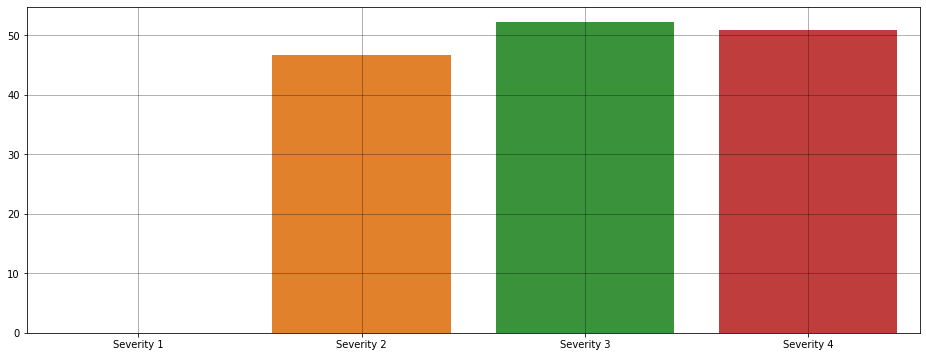

In [7]:
Temperature = data_Denver['Temperature(F)']
Severity_1_data = data_Denver[data_Denver['Severity']==1]['Temperature(F)'].mean()
Severity_2_data = data_Denver[data_Denver['Severity']==2]['Temperature(F)'].mean()
Severity_3_data = data_Denver[data_Denver['Severity']==3]['Temperature(F)'].mean()
Severity_4_data = data_Denver[data_Denver['Severity']==4]['Temperature(F)'].mean()
Severity_labels = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']
Mean_temp_by_severity = [Severity_1_data, Severity_2_data, Severity_3_data, Severity_4_data]
plt.figure(figsize=(16, 6))
sns.barplot(Severity_labels, Mean_temp_by_severity)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)

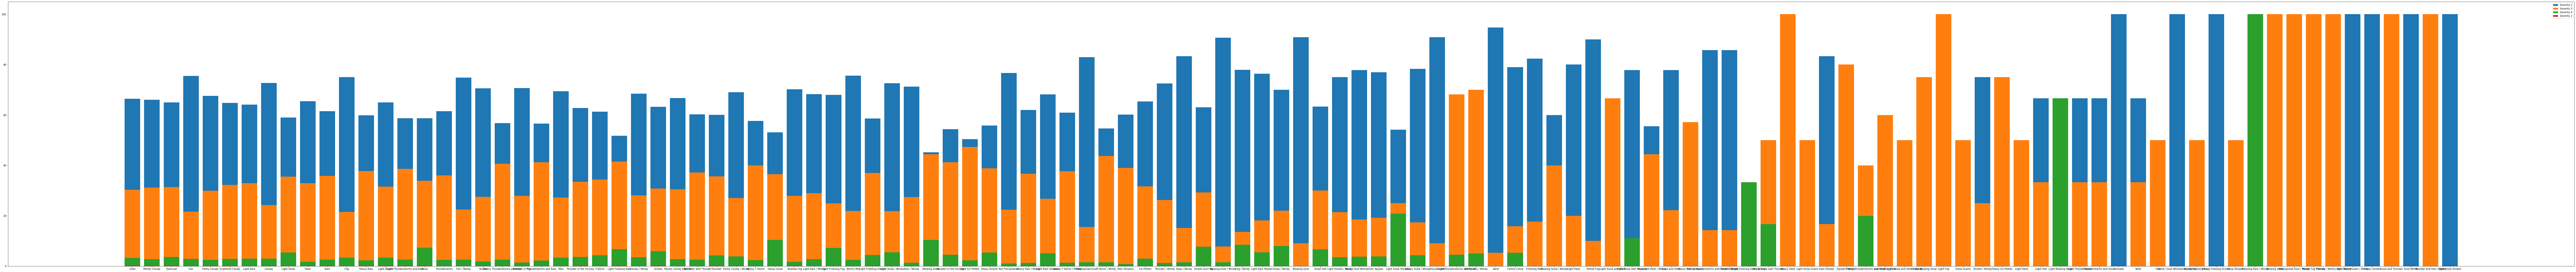

In [8]:
Weather = data.Weather_Condition.value_counts()
severity_1_by_Weather = []
severity_2_by_Weather = []
severity_3_by_Weather = []
severity_4_by_Weather = []
for i in Weather.index:
    severity_1_by_Weather.append(data[(data['Severity']==1)&(data['Weather_Condition']==i)].count()['ID'])
    severity_2_by_Weather.append(data[(data['Severity']==2)&(data['Weather_Condition']==i)].count()['ID'])
    severity_3_by_Weather.append(data[(data['Severity']==3)&(data['Weather_Condition']==i)].count()['ID'])
    severity_4_by_Weather.append(data[(data['Severity']==4)&(data['Weather_Condition']==i)].count()['ID'])
percentage_severity_1 = []
percentage_severity_2 = []
percentage_severity_3 = []
percentage_severity_4 = []
for i in range(len(severity_1_by_Weather)):
    percentage_severity_1.append((severity_1_by_Weather[i]/Weather[i])*100)
    percentage_severity_2.append((severity_2_by_Weather[i]/Weather[i])*100)
    percentage_severity_3.append((severity_3_by_Weather[i]/Weather[i])*100)
    percentage_severity_4.append((severity_4_by_Weather[i]/Weather[i])*100)
percentage_severity_3[1]+percentage_severity_2[1]+percentage_severity_1[1]+percentage_severity_4[1]
plt.figure(figsize=(189, 20))

plt.bar(Weather.index, percentage_severity_2, label='Severity 2')
plt.bar(Weather.index, percentage_severity_3, label='Severity 3')
plt.bar(Weather.index, percentage_severity_4, label='Severity 4')
plt.bar(Weather.index, percentage_severity_1, label='Severity 1')
plt.legend()

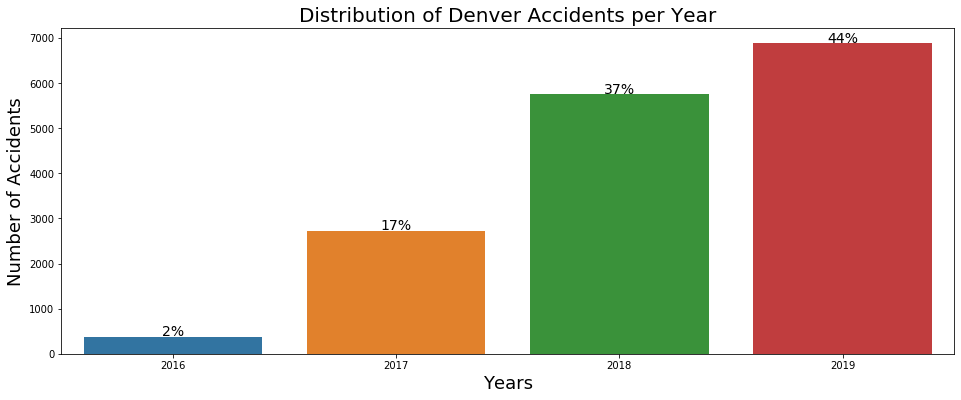

In [6]:
fig = plt.figure(figsize=(16,6))
ax = sns.countplot(data=data_Denver,x='Year')
ax.set_title('Distribution of Denver Accidents per Year', size= 20)
ax.set_xlabel('Years', size=18)
ax.set_ylabel('Number of Accidents', size=18)
total = len(data_Denver)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 20,
            '{:1.0f}%'.format(height/total*100),
            ha="center",
            fontsize=14)

In [7]:
print('Comment:The number of accidents has risen 5 times from 2016 to 2017, then doubled from 2017 to 2018 before increasing a small number from 2018 to 2019.')

Comment:The number of accidents has risen 5 times from 2016 to 2017, then doubled from 2017 to 2018 before increasing a small number from 2018 to 2019.


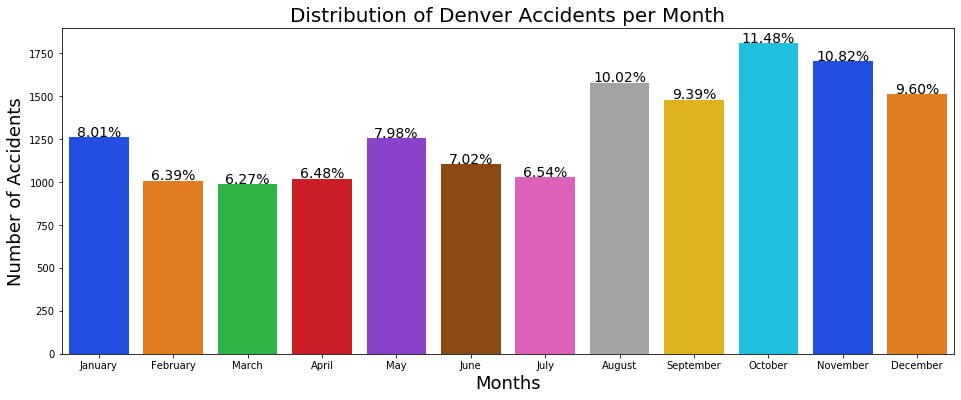

In [8]:
fig = plt.figure(figsize=(16,6))
ax = sns.countplot(data=data_Denver,x='Month',palette='bright')
ax.set_title('Distribution of Denver Accidents per Month', size= 20)
ax.set_xlabel('Months', size=18)
ax.set_xticklabels(months)
ax.set_ylabel('Number of Accidents', size=18)
total = len(data_Denver)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center",
            fontsize=14) 

In [9]:
print('Comment: Most accidents happen in October, followed by November. March is the month with less accidents.')

Comment: Most accidents happen in October, followed by November. March is the month with less accidents.


In [10]:
matrix_month = pd.pivot_table(data=data_Denver,values='ID',index=['Year'],columns='Month',aggfunc='count')
matrix_month.columns = months
matrix_month

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,15.0,53.0,57.0,75.0,59.0,66.0,57.0
2017,44.0,39.0,41.0,42.0,80.0,64.0,83.0,451.0,482.0,556.0,418.0,426.0
2018,458.0,451.0,420.0,386.0,485.0,437.0,360.0,504.0,532.0,543.0,668.0,515.0
2019,760.0,517.0,526.0,592.0,692.0,589.0,534.0,567.0,390.0,650.0,553.0,514.0


Text(767.7272727272725, 0.5, 'Year')

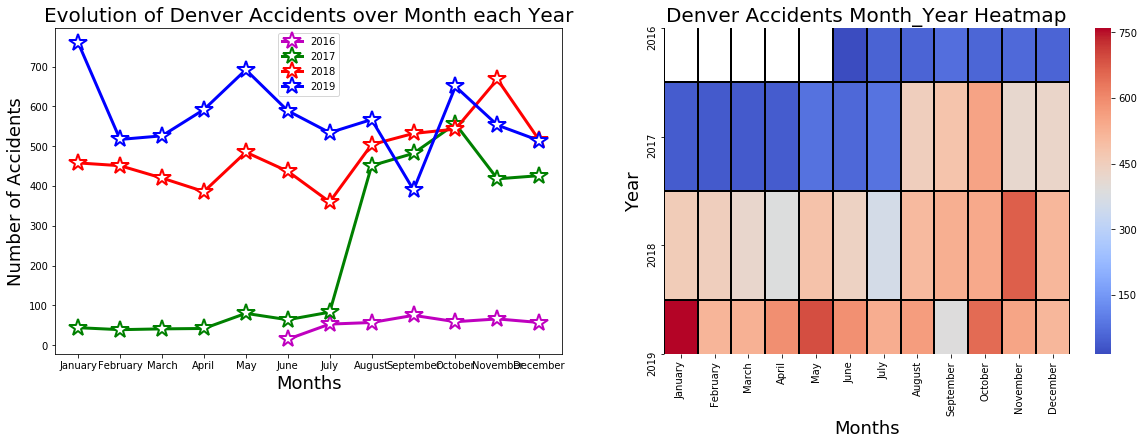

In [11]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(matrix_month.loc[2016],color='m',label='2016',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='m',markeredgewidth='2')
ax[0].plot(matrix_month.loc[2017],color='g',label='2017',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='g',markeredgewidth='2')
ax[0].plot(matrix_month.loc[2018],color='r',label='2018',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='r',markeredgewidth='2')
ax[0].plot(matrix_month.loc[2019],color='b',label='2019',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')
ax[0].legend(loc=0)
ax[0].set_title('Evolution of Denver Accidents over Month each Year', size= 20)
ax[0].set_xlabel('Months', size=18)
ax[0].set_ylabel('Number of Accidents', size=18)
sns.heatmap(matrix_month,cmap='coolwarm',linewidth=1,linecolor='black',ax=ax[1],xticklabels=months)
ax[1].set_title('Denver Accidents Month_Year Heatmap', size= 20)
ax[1].set_xlabel('Months', size=18)
ax[1].set_ylabel('Year', size=18)

In [12]:
df_evolution = pd.concat([matrix_month.loc[[2016]].rename(index={2016:'Number of Accidents'}),
                         matrix_month.loc[[2017]].rename(index={2017:'Number of Accidents'}),
                        matrix_month.loc[[2018]].rename(index={2018:'Number of Accidents'}),
                        matrix_month.loc[[2019]].rename(index={2019:'Number of Accidents'})],
                         keys=years,axis=1)
df_evolution.index.name = 'Accidents'
df_evolution

2016                                              \
                    January February March April May  June  July August   
Accidents                                                                 
Number of Accidents     NaN      NaN   NaN   NaN NaN  15.0  53.0   57.0   

                                       ...   2019                              \
                    September October  ...  March  April    May   June   July   
Accidents                              ...                                      
Number of Accidents      75.0    59.0  ...  526.0  592.0  692.0  589.0  534.0   

                                                                
                    August September October November December  
Accidents                                                       
Number of Accidents  567.0     390.0   650.0    553.0    514.0  

[1 rows x 48 columns]

Text(0, 0.5, 'Number of Accidents')

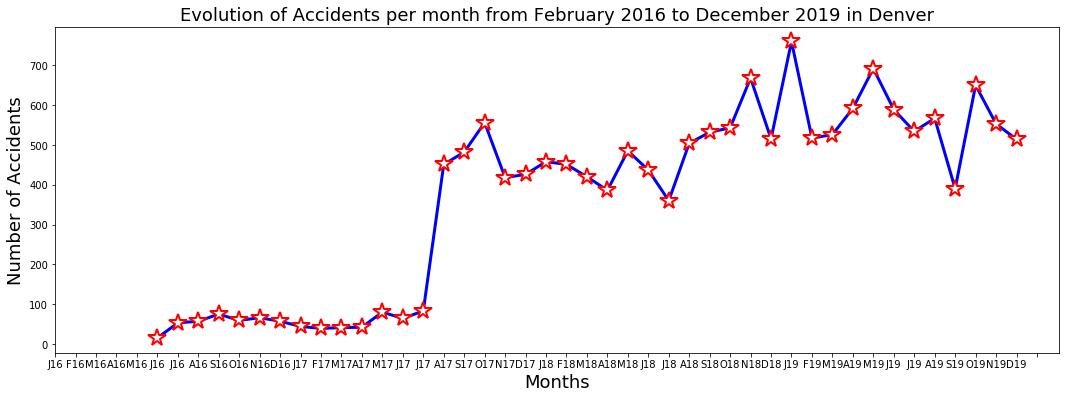

In [13]:
temp = []
for y in years:
  for m in months:
    temp.append(m[0]+y[2:])
    x_values= np.array(temp)
y_values = df_evolution.loc['Number of Accidents'].values 
plt.figure(figsize=(18,6))
plt.plot(y_values,color='b',linewidth=3,linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='r',markeredgewidth='2')
plt.xticks(ticks=np.arange(0,49),labels=x_values); 
plt.title('Evolution of Accidents per month from February 2016 to December 2019 in Denver',size=18)
plt.xlabel('Months', size=18)
plt.ylabel('Number of Accidents', size=18)

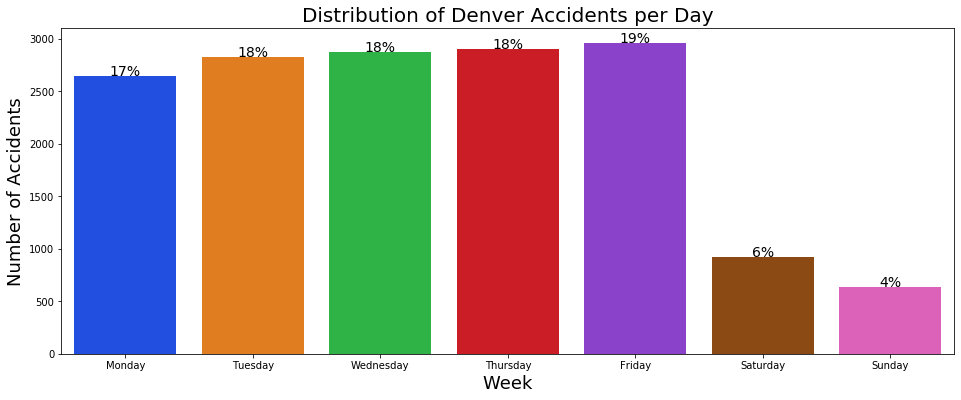

In [22]:
fig = plt.figure(figsize=(16,6))
ax = sns.countplot(data=data_Denver,x='Weekday',palette='bright')
ax.set_title('Distribution of Denver Accidents per Day', size= 20)
ax.set_xlabel('Week', size=18)
ax.set_xticklabels(days)
ax.set_ylabel('Number of Accidents', size=18)
total = len(data_Denver)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 5,
            '{:1.0f}%'.format(height/total*100),
            ha="center",
            fontsize=14) 

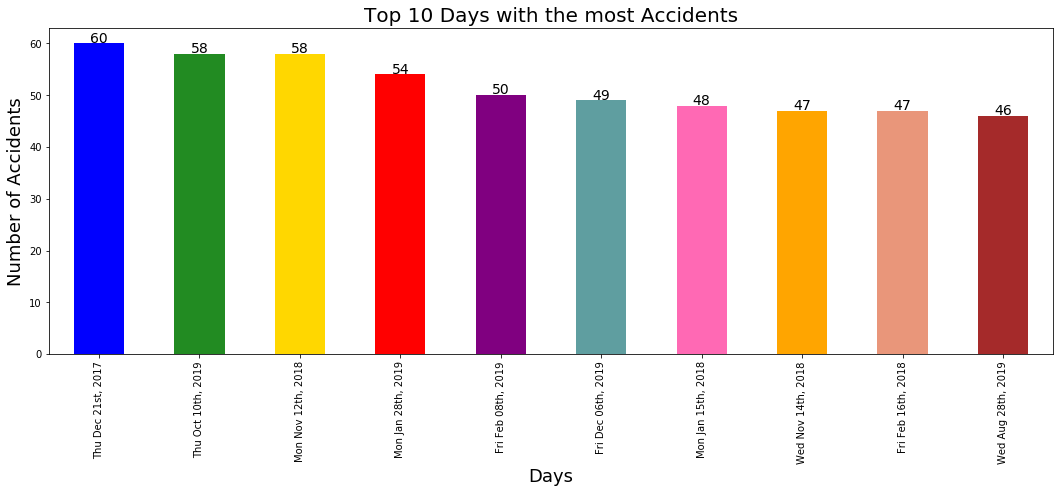

In [15]:
accidents_per_day = data_Denver['Date'].value_counts()
accidents_per_day.head(5)
data_per_day = pd.DataFrame({'Date': accidents_per_day.index,'Number of Accidents': accidents_per_day.values})
data_per_day['Percentage'] = data_per_day['Number of Accidents'].\
                                        apply(lambda x: '{:05.2f}'.format(x/len(data_per_day)*100))
rank = np.arange(1,11)
df_top10_days = data_per_day.head(10).set_index(rank)
df_top10_days
fig = plt.figure(figsize=(18,6))
df_days = df_top10_days.set_index('Date')
color = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
ax = df_days['Number of Accidents'].plot.bar(color=color)
plt.title("Top 10 Days with the most Accidents",size=20)
plt.xlabel('Days',size=18)
plt.ylabel('Number of Accidents',size=18)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 0.2,
            '{}'.format(height),
            ha="center",
            fontsize=14) 

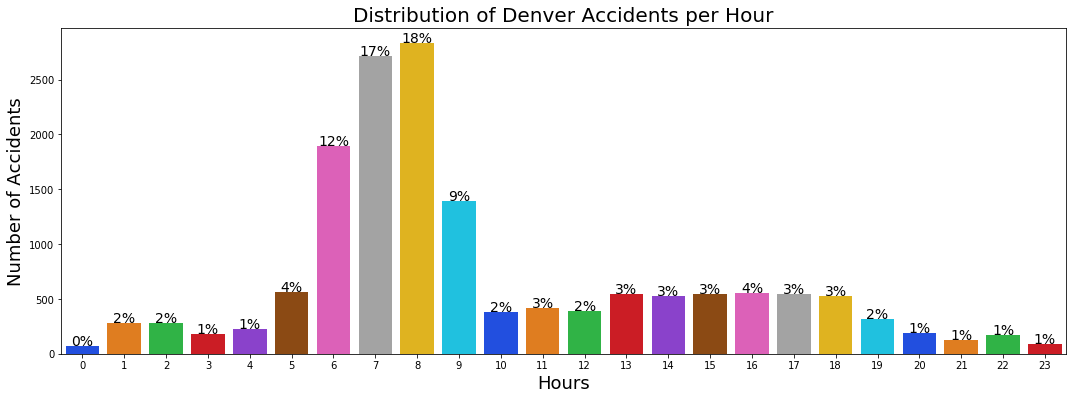

In [16]:
fig = plt.figure(figsize=(18,6))
ax = sns.countplot(data=data_Denver,x='Hour',palette='bright')
ax.set_title('Distribution of Denver Accidents per Hour', size= 20)
ax.set_xlabel('Hours', size=18)
ax.set_ylabel('Number of Accidents', size=18)
total = len(data_Denver)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 5,
            '{:1.0f}%'.format(height/total*100),
            ha="center",
            fontsize=14) 

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
sizes = data_Denver.groupby('Severity').size()
sizes = sizes[[2,1,3,4]] 
labels = 'Severity 2','Severity 1', 'Severity 3', 'severity 4' 
explode = (0.1,0.1,0.1,0.1)
colors = ['red','purple','green','yellow']
ax[0].pie(sizes, explode=explode, labels= labels,colors=colors,autopct='%1.2f%%',shadow=True, startangle=0)
ax[0].axis('equal') 
ax[0].set_title('Accidents by Severity', size=20)
sns.countplot(data=data,x='Severity', hue='Sunrise_Sunset',ax=ax[1])
ax[1].set_title('Accidents by Severity and Moment', size= 20)
ax[1].set_xlabel('Severity', size=18)
ax[1].set_ylabel('Number of Accidents', size=18)

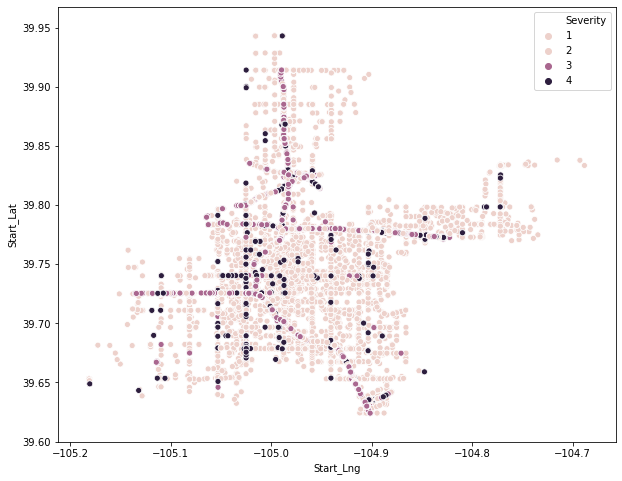

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=data_Denver)

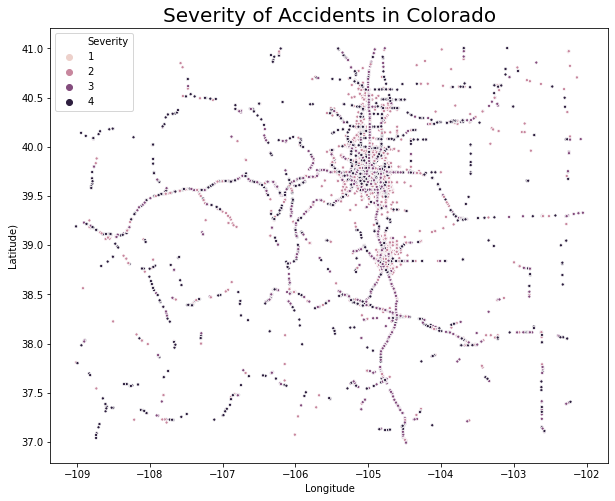

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='Severity', data=data.loc[data.State=='CO'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.title('Severity of Accidents in Colorado', fontsize=20)
plt.show()

In [19]:
data_Colorado = data[(data['State']=='CO')]

In [20]:
import folium
m = folium.Map(location=[data_Colorado.Start_Lat.mean(),data_Colorado.Start_Lng.mean()], zoom_start=4,tiles="CartoDB dark_matter")
data_Colorado.apply(lambda row:folium.CircleMarker(location=[row["Start_Lat"], row["Start_Lng"]],radius=1).add_to(m), axis=1)
m.save('./map.html')

In [21]:
from IPython.display import FileLink
print("The following is a map for Colorado accidents")
FileLink(r'map.html')

The following is a map for Colorado accidents


C:\Users\rishi\Desktop\ProjectML\map.html